In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
# Duomenų rinkiniai - https://data.gov.lt/datasets/1828/#info
# (Elektros energijos suvartojimas pagal regionus, kas pusmetį)


# Pateikite elektros energijos
# suvartojimo apžvalgą: Kokie regionai/miestai daugiausiai vartojo,
# kurie - mažiausiai? Ar yra priklausomybė tarp vartojimo ir
# mėnesių, vidutinių mėnesio meteorologinių sąlygų? Ar galite
# surasti/identifikuoti elektros energiją pasigaminančius vartotojus?
# Su plotly.express scatter_mapbox()
# vizualizuokite daugiausiai energijos vartojančius
# miestus/miestelius/teritorijas. Daug energijos vartojantis objektas –
# suvartoja ~30 proc daugiau el. energijos, nei vidutinis energijos
# suvartojimas objekto teritorijoje.

# ax2 = ax.twinx()

In [2]:
didmiesciai1 = pd.read_csv('../../../eismas/didmiesciai1.csv',sep=';')
didmiesciai2 = pd.read_csv('../../../eismas/didmiesciai2.csv', sep=';')
vidutiniai1 = pd.read_excel('../../../eismas/vidutiniai1.xlsx')
vidutiniai2 = pd.read_csv('../../../eismas/vidutiniai2.csv', sep=';', encoding="windows-1257")
kiti1 = pd.read_csv('../../../eismas/kiti1.csv',sep=';', encoding="windows-1257")
kiti2 = pd.read_csv('../../../eismas/kiti2.csv', sep=';', encoding="windows-1257")
# vidutiniai2.head(2)

In [3]:
firts_6 = {
    'KWH01' : 'Sausis',
    'KWH02' : 'Vasaris',
    'KWH03' : 'Kovas',
    'KWH04' : 'Balandis',
    'KWH05' : 'Gegužė',
    'KWH06' : 'Birželis'
}

last_6 = {
    'KWH07' : 'Liepa',
    'KWH08' : 'Rugpjūtis',
    'KWH09' : 'Rugsėjis',
    'KWH10' : 'Spalis',
    'KWH11' : 'Lapkritis',
    'KWH12' : 'Gruodis'
}

In [4]:
didmiesciai1 = didmiesciai1.drop_duplicates()
print(didmiesciai1['REGIONAS'].unique())
print(len(didmiesciai1['REGIONAS'].unique()))
didmiesciai1.rename(columns=firts_6, inplace=True)
didmiesciai1.head(2)

['Vilniaus regionas' 'Klaipėdos regionas' 'Kauno regionas']
3


,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis
0,Vilniaus regionas,KV,NaN,NaN,0,3459470.8,3389592.8,3656872.6,3631011.4,3591220.6,3698914.8
1,Vilniaus regionas,KV,NaN,NaN,NaN,3459470.8,3389592.8,3656872.6,3631011.4,3591220.6,3698914.8


In [5]:
didmiesciai2 = didmiesciai2.drop_duplicates()
print(didmiesciai2['REGIONAS'].unique())
print(len(didmiesciai2['REGIONAS'].unique()))
didmiesciai2.rename(columns=last_6, inplace=True)
didmiesciai2.head(2)

['Vilniaus regionas' 'Klaipėdos regionas' 'Kauno regionas']
3


,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis
0,Vilniaus regionas,KV,NaN,NaN,0,4047020.8,3941376.4,3819321.4,3913849.0,3877301.2,3998284.0
1,Vilniaus regionas,KV,NaN,NaN,NaN,4047020.8,3941376.4,3819321.4,3913849.0,3877301.2,3998284.0


In [6]:
vidutiniai1 = vidutiniai1.drop_duplicates()
print(vidutiniai1['REGIONAS'].unique())
print(len(vidutiniai1['REGIONAS'].unique()))
vidutiniai1.rename(columns=firts_6, inplace=True)
vidutiniai1.head(2)

['Šiaulių regionas' 'Panevėžio regionas' 'Mažeikių regionas'
 'Alytaus regionas']
4


,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis
0,Šiaulių regionas,KV,NaN,NaN,NaN,1052547.8,908230.0,1135250.2,1120408.4,1185698.4,1253056.0
2,Šiaulių regionas,KV,NaN,NaN,0,1052547.8,908230.0,1135250.2,1120408.4,1185698.4,1253056.0


In [7]:
vidutiniai2 = vidutiniai2.drop_duplicates()
print(vidutiniai2['REGIONAS'].unique())
print(len(vidutiniai2['REGIONAS'].unique()))
vidutiniai2.rename(columns=last_6, inplace=True)
vidutiniai2.head(2)

['Šiaulių regionas'
 'Šiaulių regionas,KV,T,Gaminantis vartotojas,"199,4",34303.0,49973.0,51328.0,48745.0,55593.0,45736.0'
 'Šiaulių regionas,KV,T,Gaminantis vartotojas,"29,88",26424.0,21555.0,26922.0,27557.0,32616.0,24551.0'
 ... 'Alytaus regionas,KV,,,"499,72",0.0,0.0,0.0,0.0,0.0,0.0'
 'Alytaus regionas,BV,,,"4,8",0.0,0.0,0.0,0.0,0.0,0.0'
 'Alytaus regionas,BV,T,Gaminantis vartotojas,"9,75",0.0,0.0,0.0,0.0,0.0,0.0']
1834


,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis
0,Šiaulių regionas,KV,NaN,NaN,NaN,1362162.0,1255867.4,1108174.2,1095702.8,1083865.4,1048594.0
1,Šiaulių regionas,KV,NaN,NaN,0.0,1362162.0,1255867.4,1108174.2,1095702.8,1083865.4,1048594.0


In [8]:
kiti1 = kiti1.drop_duplicates()
print(kiti1['REGIONAS'].unique())
print(len(kiti1['REGIONAS'].unique()))
kiti1.rename(columns=firts_6, inplace=True)
kiti1.head(2)

['Švenčionių regionas'
 'Švenčionių regionas,BV,T,Gaminantis vartotojas,"9,6",254.0,10640.0,724.0,501.0,223.0,148.0'
 'Švenčionių regionas,BV,T,Gaminantis vartotojas,"10,35",2735.0,2768.0,2302.0,153.0,3487.0,1029.0'
 ...
 'Gargždų regionas,BV,T,Gaminantis vartotojas,"16,02",0.0,0.0,0.0,140.0,22.0,70.0'
 'Gargždų regionas,KV,T,,"29,64",26.0,28.0,31.0,44.0,38.0,39.0'
 'Gargždų regionas,BV,T,Gaminantis vartotojas,"4,8",40.0,40.0,0.0,62.0,23.0,3.0']
9418


,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis
0,Švenčionių regionas,KV,T,NaN,0.0,605781.0,575742.2,584244.2,548519.8,518863.6,611692.2
1,Švenčionių regionas,KV,NaN,NaN,NaN,605781.0,575742.2,584244.2,548519.8,518863.6,611692.2


In [10]:
kiti2 = kiti2.drop_duplicates()
print(kiti2['REGIONAS'].unique())
print(len(kiti2['REGIONAS'].unique()))
kiti2.rename(columns=last_6, inplace=True)
kiti2.head(2)

['Švenčionių regionas'
 'Švenčionių regionas,KV,T,Gaminantis vartotojas,"28,29",34843.0,40426.0,39540.0,44135.0,43093.0,49109.0'
 'Švenčionių regionas,KV,T,Gaminantis vartotojas,"9,99",15868.0,12601.0,10387.0,10064.0,10285.0,10840.0'
 ... 'Ignitis INT,BV,,,"8,5",0.0,0.0,0.0,0.0,0.0,0.0'
 'Ignitis INT,BV,T,,"5,2",0.0,0.0,0.0,0.0,0.0,0.0'
 'Ignitis INT,BV,,,"12,42",0.0,0.0,0.0,0.0,0.0,0.0']
10255


,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis
0,Švenčionių regionas,KV,T,NaN,0.0,616291.6,568311.2,537184.4,558586.2,777806.0,562580.0
1,Švenčionių regionas,KV,NaN,NaN,NaN,616291.6,568311.2,537184.4,558586.2,777806.0,562580.0


In [11]:
didmiesciai1.columns

Index(['REGIONAS', 'SUT_TIPAS', 'SUT_GAM', 'GV_TIPAS', 'GEN_GALIA', 'Sausis',
       'Vasaris', 'Kovas', 'Balandis', 'Gegužė', 'Birželis'],
      dtype='object')

In [12]:
didm_gr1 = didmiesciai1.groupby('REGIONAS')[['Sausis','Vasaris', 'Kovas', 'Balandis', 'Gegužė', 'Birželis']].sum().reset_index()
didm_gr1.head(2)

,REGIONAS,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis
0,Kauno regionas,1.219657e+08,1.192787e+08,1.196831e+08,1.102187e+08,1.064671e+08,1.094048e+08
1,Klaipėdos regionas,6.760214e+07,6.253260e+07,6.401894e+07,5.933475e+07,5.602941e+07,5.798408e+07


In [13]:
didmiesciai2.columns

Index(['REGIONAS', 'SUT_TIPAS', 'SUT_GAM', 'GV_TIPAS', 'GEN_GALIA', 'Liepa',
       'Rugpjūtis', 'Rugsėjis', 'Spalis', 'Lapkritis', 'Gruodis'],
      dtype='object')

In [14]:
didm_gr2 = didmiesciai2.groupby('REGIONAS')[['Liepa','Rugpjūtis', 'Rugsėjis', 'Spalis', 'Lapkritis', 'Gruodis']].sum().reset_index()
didm_gr2.head(2)

,REGIONAS,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis
0,Kauno regionas,1.110757e+08,1.044560e+08,1.098376e+08,1.160255e+08,1.226913e+08,1.425979e+08
1,Klaipėdos regionas,6.320891e+07,6.103544e+07,6.086513e+07,6.452075e+07,6.647958e+07,7.821187e+07


In [25]:
didm = pd.merge(didm_gr1, didm_gr2, on='REGIONAS')
didm.head(2)

,REGIONAS,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis
0,Kauno regionas,1.219657e+08,1.192787e+08,1.196831e+08,1.102187e+08,1.064671e+08,1.094048e+08,1.110757e+08,1.044560e+08,1.098376e+08,1.160255e+08,1.226913e+08,1.425979e+08
1,Klaipėdos regionas,6.760214e+07,6.253260e+07,6.401894e+07,5.933475e+07,5.602941e+07,5.798408e+07,6.320891e+07,6.103544e+07,6.086513e+07,6.452075e+07,6.647958e+07,7.821187e+07


In [26]:
didm['bendras'] = didm.drop('REGIONAS', axis=1).sum(axis=1)
didm.head(2)

,REGIONAS,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis,bendras
0,Kauno regionas,1.219657e+08,1.192787e+08,1.196831e+08,1.102187e+08,1.064671e+08,1.094048e+08,1.110757e+08,1.044560e+08,1.098376e+08,1.160255e+08,1.226913e+08,1.425979e+08,1.393702e+09
1,Klaipėdos regionas,6.760214e+07,6.253260e+07,6.401894e+07,5.933475e+07,5.602941e+07,5.798408e+07,6.320891e+07,6.103544e+07,6.086513e+07,6.452075e+07,6.647958e+07,7.821187e+07,7.618236e+08


In [17]:
didm.columns

Index(['REGIONAS', 'Sausis', 'Vasaris', 'Kovas', 'Balandis', 'Gegužė',
       'Birželis', 'Liepa', 'Rugpjūtis', 'Rugsėjis', 'Spalis', 'Lapkritis',
       'Gruodis', 'bendras'],
      dtype='object')

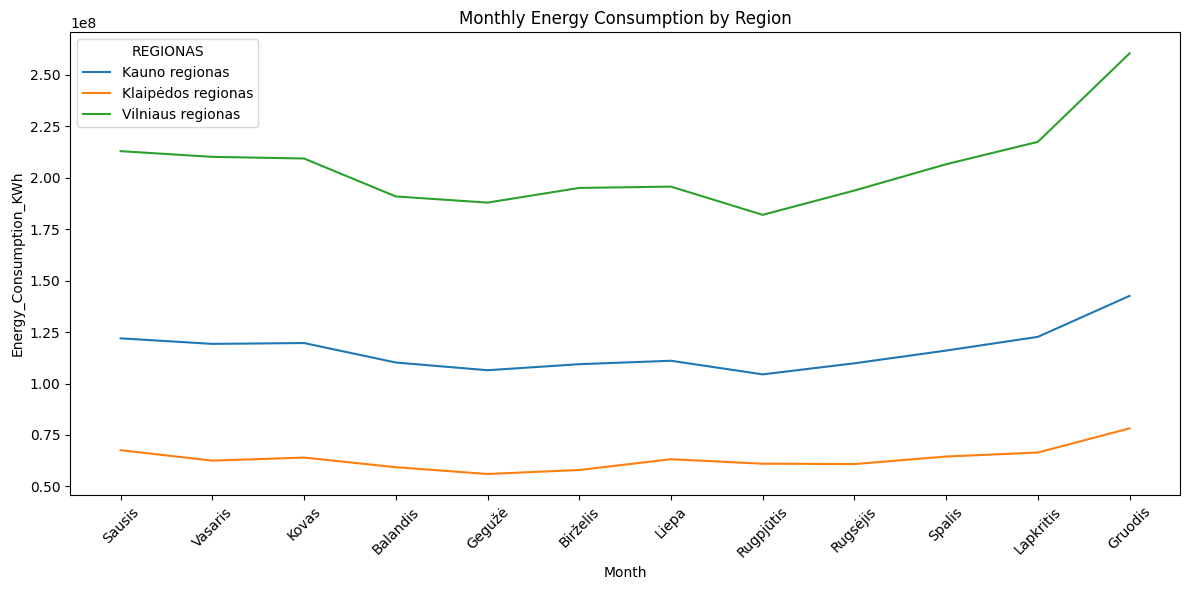

In [27]:

# Create DataFrame
# df = pd.DataFrame(data)

# Melt the DataFrame to long format
df_long = pd.melt(didm.drop(columns=['bendras']), id_vars=['REGIONAS'], var_name='Month', value_name='Energy_Consumption_KWh')

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Month', y='Energy_Consumption_KWh', hue='REGIONAS')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.title('Monthly Energy Consumption by Region')
plt.tight_layout()
plt.show()

# Įžvelgiame kad kuo didisnis regionas, tuo daugiau energijos suvartojamam.
# Energijos vartojimas sumažėjas ties pavasariu ir rudeniu.
# Vasarą tikėtina daugiau papildomos energijos suvartojama dėl kondicionavimo, žiemą - dėl šildymo

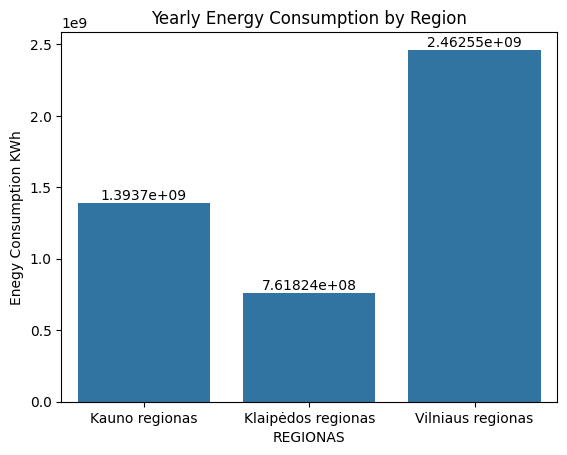

In [28]:
fig, ax = plt.subplots()
sns.barplot(data=didm, x='REGIONAS', y='bendras')
plt.title('Yearly Energy Consumption by Region')
plt.ylabel('Enegy Consumption KWh')
for i in ax.containers:
    ax.bar_label(i)
plt.show()
#  Didmiesčiause daugiausiai per metus energijos suvartoja Vilniaus regionas.
# Vilniaus regionas suvartoja daugiau energijos nei Kauno ir Klaipėdos regionai kartu sudėjus

In [21]:
vidutiniai1.columns
vidutiniai2.columns

Index(['REGIONAS', 'SUT_TIPAS', 'SUT_GAM', 'GV_TIPAS', 'GEN_GALIA', 'Liepa',
       'Rugpjūtis', 'Rugsėjis', 'Spalis', 'Lapkritis', 'Gruodis'],
      dtype='object')

In [47]:
vidutiniai2['REGIONAS'] = vidutiniai2['REGIONAS'].apply(lambda x: 'Alytaus regionas' if 'Alytaus' in x else x)
vidutiniai2['REGIONAS'] = vidutiniai2['REGIONAS'].apply(lambda x: 'Mažeikių regionas' if 'Mažeiki' in x else x)
vidutiniai2['REGIONAS'] = vidutiniai2['REGIONAS'].apply(lambda x: 'Panevėžio regionas' if 'Panevėž' in x else x)
vidutiniai2['REGIONAS'] = vidutiniai2['REGIONAS'].apply(lambda x: 'Šiaulių regionas' if 'Šiaul' in x else x)
vidutiniai2.head(2)

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis
0,Šiaulių regionas,KV,NaN,NaN,NaN,1362162.0,1255867.4,1108174.2,1095702.8,1083865.4,1048594.0
1,Šiaulių regionas,KV,NaN,NaN,0.0,1362162.0,1255867.4,1108174.2,1095702.8,1083865.4,1048594.0


In [48]:
vidutiniai2['REGIONAS'].unique()

array(['Šiaulių regionas', 'Panevėžio regionas', 'Mažeikių regionas',
       'Alytaus regionas'], dtype=object)

In [49]:
vidm_gr1 = vidutiniai1.groupby('REGIONAS')[['Sausis','Vasaris', 'Kovas', 'Balandis', 'Gegužė', 'Birželis']].sum().reset_index()
vidm_gr2 = vidutiniai2.groupby('REGIONAS')[['Liepa','Rugpjūtis', 'Rugsėjis', 'Spalis', 'Lapkritis', 'Gruodis']].sum().reset_index()
# vidm = pd.merge(vidm_gr1, vidm_gr2, on='REGIONAS')
# # vidm.head(2)

In [51]:
vidm_gr1['REGIONAS'].unique()
vidm_gr2['REGIONAS'].unique()

array(['Alytaus regionas', 'Mažeikių regionas', 'Panevėžio regionas',
       'Šiaulių regionas'], dtype=object)

In [38]:
# lentelėje vidm_gr2 suviedinam Regionus
vidm_gr2['REGIONAS'] = vidm_gr2['REGIONAS'].apply(lambda x: 'Alytaus regionas' if 'Alytaus' in x else x)
vidm_gr2['REGIONAS'] = vidm_gr2['REGIONAS'].apply(lambda x: 'Mažeikių regionas' if 'Mažeiki' in x else x)
vidm_gr2['REGIONAS'] = vidm_gr2['REGIONAS'].apply(lambda x: 'Panevėžio regionas' if 'Panevėž' in x else x)
vidm_gr2['REGIONAS'] = vidm_gr2['REGIONAS'].apply(lambda x: 'Šiaulių regionas' if 'Šiaul' in x else x)

In [52]:
vidm_gr2.head(2)

,REGIONAS,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis
0,Alytaus regionas,15514579.4,15213504.72,15583302.57,16049473.89,16216005.07,20262488.73
1,Mažeikių regionas,10164750.4,10066682.91,10309351.52,10771939.15,11066901.31,13667459.33


In [53]:
vidm_gr2['REGIONAS'].unique()

array(['Alytaus regionas', 'Mažeikių regionas', 'Panevėžio regionas',
       'Šiaulių regionas'], dtype=object)

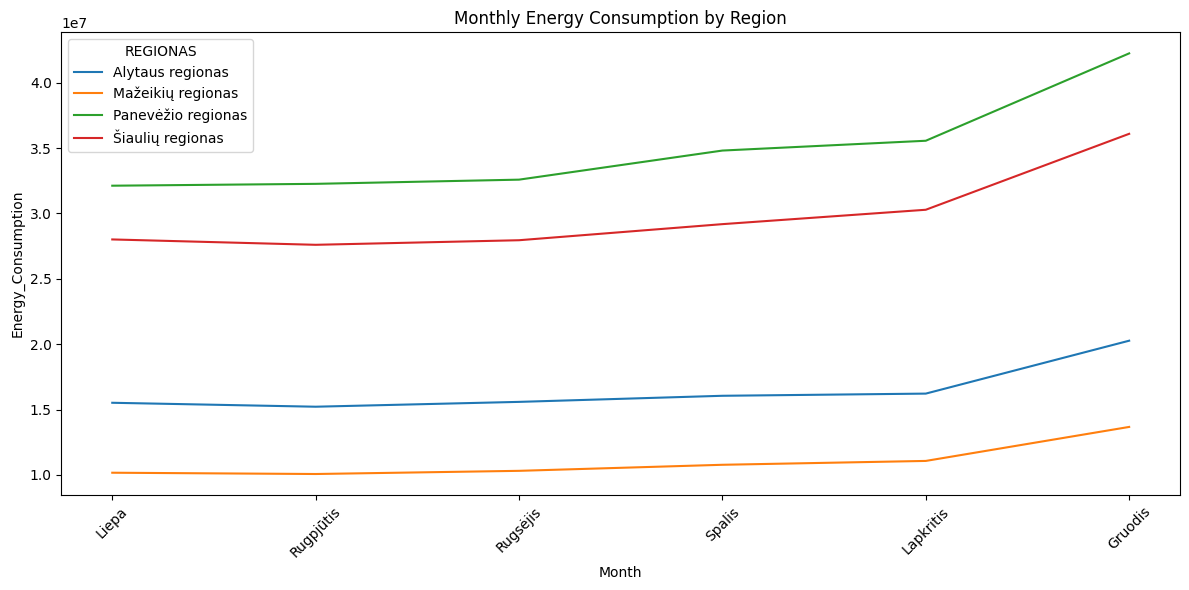

In [54]:
# Melt the DataFrame to long format
df_long_vidm_gr1 = pd.melt(vidm_gr2, id_vars=['REGIONAS'], var_name='Month', value_name='Energy_Consumption')

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long_vidm_gr1, x='Month', y='Energy_Consumption', hue='REGIONAS')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.title('Monthly Energy Consumption by Region')
plt.tight_layout()
plt.show()

In [55]:
vidm = pd.merge(vidm_gr1, vidm_gr2, on='REGIONAS')
print(vidm['REGIONAS'].unique())
vidm.head(2)

['Alytaus regionas' 'Mažeikių regionas' 'Panevėžio regionas'
 'Šiaulių regionas']


,REGIONAS,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis
0,Alytaus regionas,20123299.60,19866989.61,19913215.16,18020739.73,17207822.57,17636441.35,15514579.4,15213504.72,15583302.57,16049473.89,16216005.07,20262488.73
1,Mažeikių regionas,11401332.57,11374781.22,11428588.87,10340079.98,9682333.43,9575865.26,10164750.4,10066682.91,10309351.52,10771939.15,11066901.31,13667459.33


In [56]:
vidm['bendras'] = vidm.drop('REGIONAS', axis=1).sum(axis=1)
vidm.head(2)

,REGIONAS,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis,bendras
0,Alytaus regionas,20123299.60,19866989.61,19913215.16,18020739.73,17207822.57,17636441.35,15514579.4,15213504.72,15583302.57,16049473.89,16216005.07,20262488.73,2.116079e+08
1,Mažeikių regionas,11401332.57,11374781.22,11428588.87,10340079.98,9682333.43,9575865.26,10164750.4,10066682.91,10309351.52,10771939.15,11066901.31,13667459.33,1.298501e+08


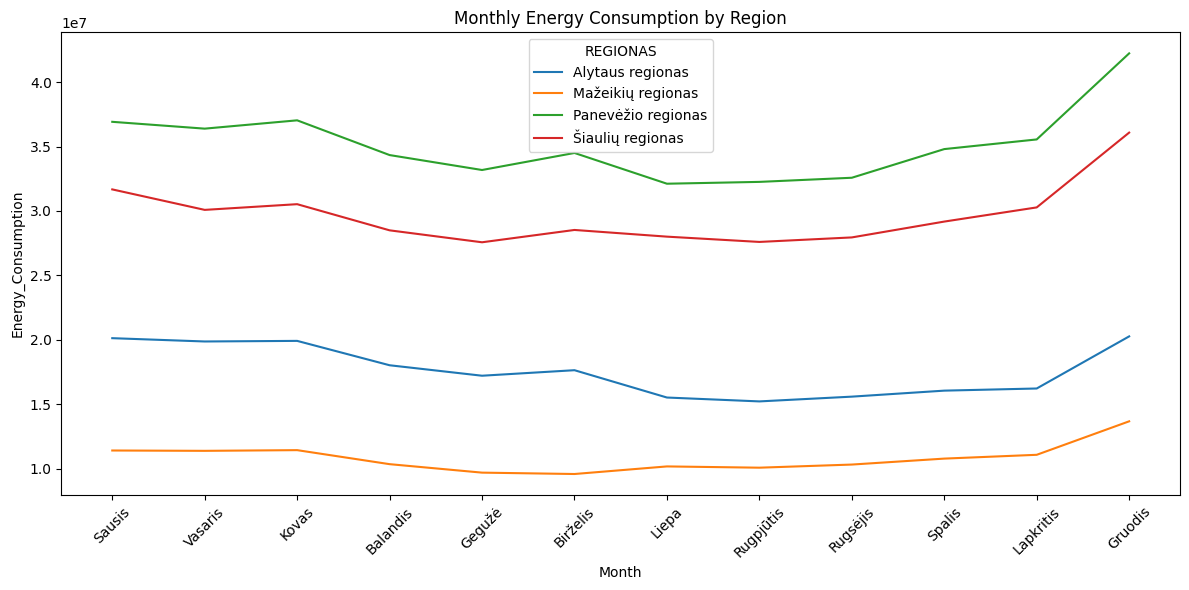

In [57]:
# Melt the DataFrame to long format
df_long_vidm = pd.melt(vidm.drop(columns=['bendras']), id_vars=['REGIONAS'], var_name='Month', value_name='Energy_Consumption')

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long_vidm, x='Month', y='Energy_Consumption', hue='REGIONAS')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.title('Monthly Energy Consumption by Region')
plt.tight_layout()
plt.show()
# Matome kad kuo rajonas didesnis(pagal žmonių skaičių), tuo energijos suvartojimas didesnis
# Energijos vartojimas sumažėjas ties pavasariu ir rudeniu.
# Vasarą tikėtina daugiau papildomos energijos suvartojama dėl kondicionavimo, žiemą - dėl šildymo

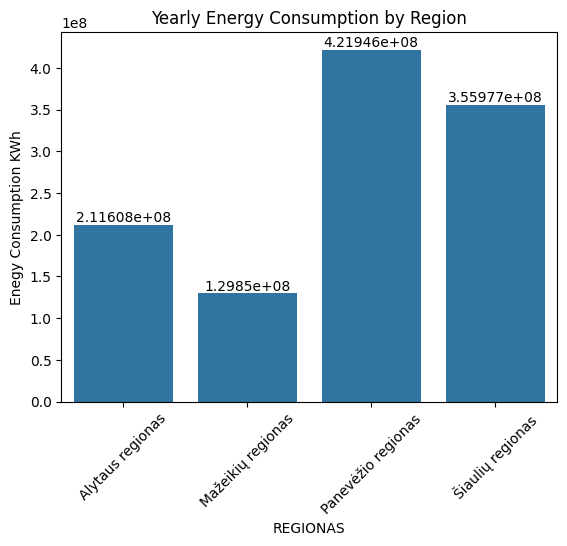

In [58]:
fig, ax = plt.subplots()
sns.barplot(data=vidm, x='REGIONAS', y='bendras')
plt.title('Yearly Energy Consumption by Region')
plt.ylabel('Enegy Consumption KWh')
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [63]:
kiti1.columns

Index(['REGIONAS', 'SUT_TIPAS', 'SUT_GAM', 'GV_TIPAS', 'GEN_GALIA', 'Sausis',
       'Vasaris', 'Kovas', 'Balandis', 'Gegužė', 'Birželis'],
      dtype='object')

In [61]:
print(len(kiti1['REGIONAS'].unique()))
kiti1['REGIONAS'].unique()

9418


array(['Švenčionių regionas',
       'Švenčionių regionas,BV,T,Gaminantis vartotojas,"9,6",254.0,10640.0,724.0,501.0,223.0,148.0',
       'Švenčionių regionas,BV,T,Gaminantis vartotojas,"10,35",2735.0,2768.0,2302.0,153.0,3487.0,1029.0',
       ...,
       'Gargždų regionas,BV,T,Gaminantis vartotojas,"16,02",0.0,0.0,0.0,140.0,22.0,70.0',
       'Gargždų regionas,KV,T,,"29,64",26.0,28.0,31.0,44.0,38.0,39.0',
       'Gargždų regionas,BV,T,Gaminantis vartotojas,"4,8",40.0,40.0,0.0,62.0,23.0,3.0'],
      dtype=object)

In [62]:
print(len(kiti2['REGIONAS'].unique()))
kiti2['REGIONAS'].unique()

10255


array(['Švenčionių regionas',
       'Švenčionių regionas,KV,T,Gaminantis vartotojas,"28,29",34843.0,40426.0,39540.0,44135.0,43093.0,49109.0',
       'Švenčionių regionas,KV,T,Gaminantis vartotojas,"9,99",15868.0,12601.0,10387.0,10064.0,10285.0,10840.0',
       ..., 'Ignitis INT,BV,,,"8,5",0.0,0.0,0.0,0.0,0.0,0.0',
       'Ignitis INT,BV,T,,"5,2",0.0,0.0,0.0,0.0,0.0,0.0',
       'Ignitis INT,BV,,,"12,42",0.0,0.0,0.0,0.0,0.0,0.0'], dtype=object)

In [65]:
kiti_gr1 = kiti1.groupby('REGIONAS')[['Sausis','Vasaris', 'Kovas', 'Balandis', 'Gegužė', 'Birželis']].sum().reset_index()
kiti_gr2 = kiti2.groupby('REGIONAS')[['Liepa','Rugpjūtis', 'Rugsėjis', 'Spalis', 'Lapkritis', 'Gruodis']].sum().reset_index()
kiti = pd.merge(kiti_gr1, kiti_gr2, on='REGIONAS')
kiti.head(2)

,REGIONAS,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis
0,Ignitis INT,41701247.14,77143743.66,59479933.82,63679701.76,54315121.04,52418481.41,54378473.34,53126116.33,56282256.22,59271665.85,66208154.39,84533569.88
1,"Ignitis INT,BV,T,,""10,01"",0.0,0.0,0.0,0.0,0.0,0.0",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [66]:
kiti = kiti[~kiti['REGIONAS'].str.contains('Ignitis', na=False)]
kiti = kiti[~kiti['REGIONAS'].str.contains('KV,', na=False)]
kiti = kiti[~kiti['REGIONAS'].str.contains('BV,', na=False)]
kiti = kiti[~kiti['REGIONAS'].str.contains('skyrius', na=False)]
kiti = kiti[~kiti['REGIONAS'].str.contains('grupė', na=False)]
kiti = kiti[~kiti['REGIONAS'].str.contains('komanda', na=False)]
kiti = kiti[~kiti['REGIONAS'].str.contains('direktorius', na=False)]
kiti.head(2)

,REGIONAS,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis
17,Jonavos regionas,8989977.27,9747376.68,9151209.17,8411279.30,7784686.95,7816668.67,7639108.85,7466211.69,8180874.79,8584076.61,8618064.49,11258923.05
18,Joniškio regionas,4270207.66,4274420.34,4280354.37,3818309.29,3615251.57,3958313.09,4734912.24,5144782.22,4624561.78,4689332.08,5114860.87,6364091.55


In [67]:
kiti['REGIONAS'].unique()

array(['Jonavos regionas', 'Joniškio regionas', 'Jurbarko regionas',
       'Kaišiadorių regionas', 'Kelmės regionas', 'Kupiškio regionas',
       'Kuršėnų regionas', 'Kėdainių regionas', 'Lazdijų regionas',
       'Marijampolės regionas', 'Molėtų regionas', 'Pakruojo regionas',
       'Palangos regionas', 'Pasvalio regionas', 'Plungės regionas',
       'Prienų regionas', 'Radviliškio regionas', 'Raseinių regionas',
       'Rokiškio regionas', 'Skuodo regionas', 'Tauragės regionas',
       'Telšių regionas', 'Trakų regionas', 'Ukmergės regionas',
       'Utenos regionas', 'Varėnos regionas', 'Vilkaviškio regionas',
       'Zarasų regionas', 'Šakių regionas', 'Šalčininkų regionas',
       'Šilalės regionas', 'Šilutės regionas', 'Širvintų regionas',
       'Švenčionių regionas'], dtype=object)

In [68]:
kiti['bendras'] = kiti.drop('REGIONAS', axis=1).sum(axis=1)
kiti.head(2)

,REGIONAS,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis,bendras
17,Jonavos regionas,8989977.27,9747376.68,9151209.17,8411279.30,7784686.95,7816668.67,7639108.85,7466211.69,8180874.79,8584076.61,8618064.49,11258923.05,1.036485e+08
18,Joniškio regionas,4270207.66,4274420.34,4280354.37,3818309.29,3615251.57,3958313.09,4734912.24,5144782.22,4624561.78,4689332.08,5114860.87,6364091.55,5.488940e+07


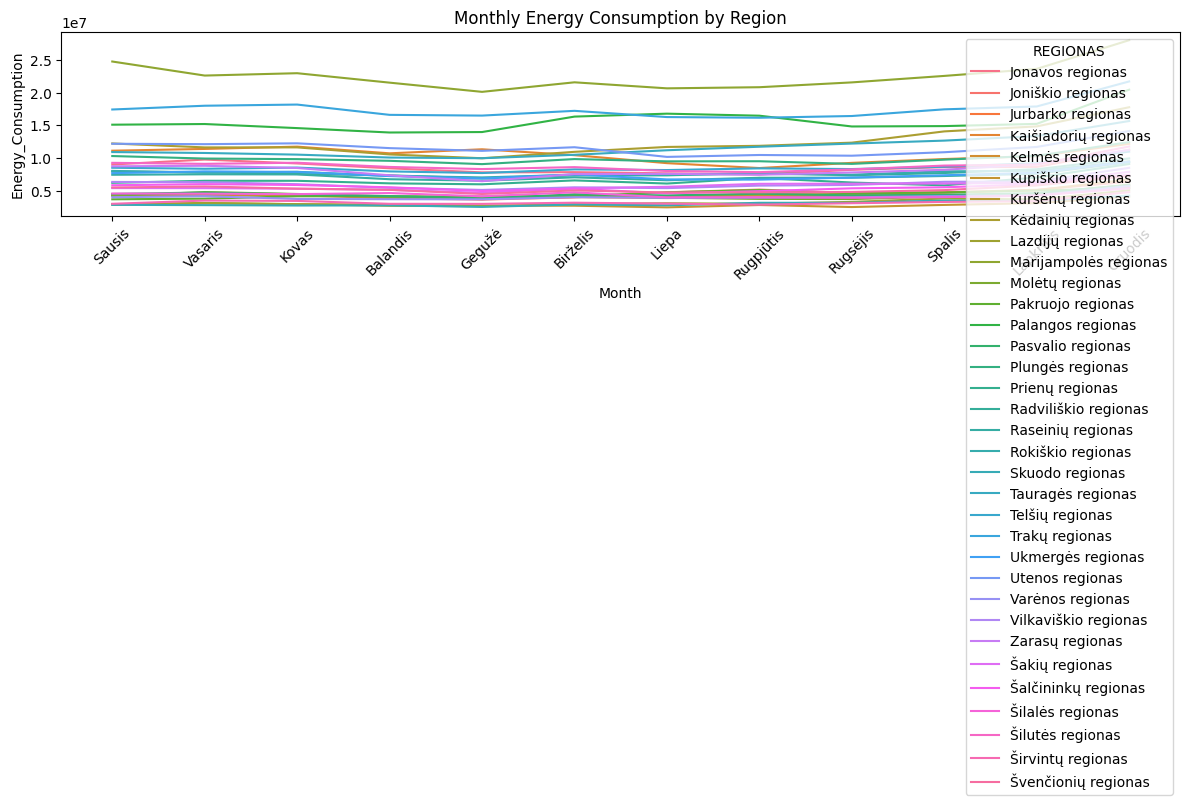

In [69]:
# Melt the DataFrame to long format
df_long_kiti = pd.melt(kiti.drop(columns=['bendras']), id_vars=['REGIONAS'], var_name='Month', value_name='Energy_Consumption')

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long_kiti, x='Month', y='Energy_Consumption', hue='REGIONAS')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.title('Monthly Energy Consumption by Region')
plt.tight_layout()
plt.show()

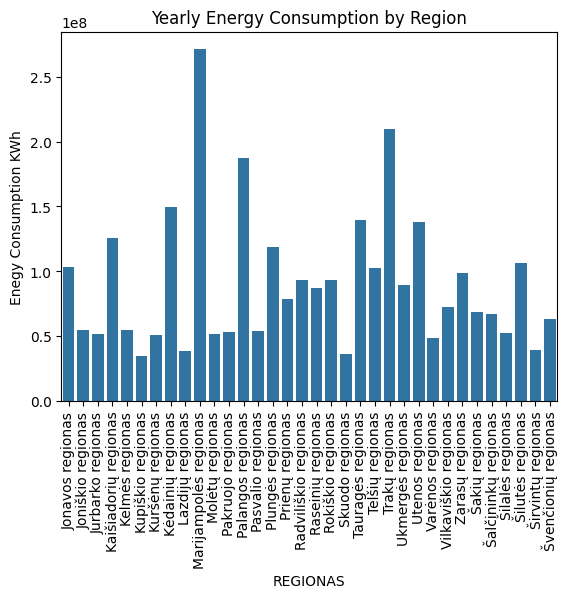

In [70]:
fig, ax = plt.subplots()
sns.barplot(data=kiti, x='REGIONAS', y='bendras')
plt.title('Yearly Energy Consumption by Region')
plt.ylabel('Enegy Consumption KWh')
plt.xticks(rotation=90)
# for i in ax.containers:
#     ax.bar_label(i)
plt.show()

In [71]:
kiti_suma = kiti['bendras'].sum()
vidm_suma = vidm['bendras'].sum()
print(kiti_suma)
print(vidm_suma)

3087737539.48
1119381341.63


In [72]:
Vilnius = didm[didm['REGIONAS'] == 'Vilniaus regionas']['bendras'].iloc[0]
Kaunas = didm[didm['REGIONAS'] == 'Kauno regionas']['bendras'].iloc[0]
Klaipeda = didm[didm['REGIONAS'] == 'Klaipėdos regionas']['bendras'].iloc[0]


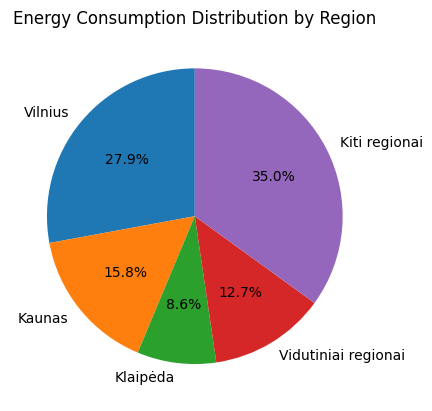

In [73]:
labeliai = ['Vilnius', 'Kaunas', 'Klaipėda', 'Vidutiniai regionai', 'Kiti regionai']
suvartojimas = [Vilnius, Kaunas, Klaipeda, vidm_suma, kiti_suma] # metinis energinos suvartojimas

plt.pie(suvartojimas, labels=labeliai, autopct='%1.1f%%', startangle=90)

# Title
plt.title('Energy Consumption Distribution by Region')

# Show the plot
plt.show()
# Matome, kad šiek tie daugiau nei puse Lietuvos suvartojamos energijos suvartoja trijų didžiųjų miestų regionai

In [3]:
#  antras bandymas sujungiant pirmines lenteles kas pusmeti
didmiesciai11 = pd.read_csv('../../../eismas/didmiesciai1.csv',sep=';')
didmiesciai22 = pd.read_csv('../../../eismas/didmiesciai2.csv', sep=';')
vidutiniai11 = pd.read_excel('../../../eismas/vidutiniai1.xlsx')
vidutiniai22 = pd.read_csv('../../../eismas/vidutiniai2.csv', sep=';', encoding="windows-1257")
kiti11 = pd.read_csv('../../../eismas/kiti1.csv',sep=';', encoding="windows-1257")
kiti22 = pd.read_csv('../../../eismas/kiti2.csv', sep=';', encoding="windows-1257")

In [4]:
firts_6 = {
    'KWH01' : 'Sausis',
    'KWH02' : 'Vasaris',
    'KWH03' : 'Kovas',
    'KWH04' : 'Balandis',
    'KWH05' : 'Gegužė',
    'KWH06' : 'Birželis'
}

last_6 = {
    'KWH07' : 'Liepa',
    'KWH08' : 'Rugpjūtis',
    'KWH09' : 'Rugsėjis',
    'KWH10' : 'Spalis',
    'KWH11' : 'Lapkritis',
    'KWH12' : 'Gruodis'
}

In [5]:
didmiesciai11 = didmiesciai11.drop_duplicates()
print(didmiesciai11['REGIONAS'].unique())
print(len(didmiesciai11['REGIONAS'].unique()))
didmiesciai11.rename(columns=firts_6, inplace=True)
didmiesciai11.head(2)

['Vilniaus regionas' 'Klaipėdos regionas' 'Kauno regionas']
3


,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis
0,Vilniaus regionas,KV,NaN,NaN,0,3459470.8,3389592.8,3656872.6,3631011.4,3591220.6,3698914.8
1,Vilniaus regionas,KV,NaN,NaN,NaN,3459470.8,3389592.8,3656872.6,3631011.4,3591220.6,3698914.8


In [6]:
didmiesciai22 = didmiesciai22.drop_duplicates()
print(didmiesciai22['REGIONAS'].unique())
print(len(didmiesciai22['REGIONAS'].unique()))
didmiesciai22.rename(columns=last_6, inplace=True)
didmiesciai22.head(2)

['Vilniaus regionas' 'Klaipėdos regionas' 'Kauno regionas']
3


,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis
0,Vilniaus regionas,KV,NaN,NaN,0,4047020.8,3941376.4,3819321.4,3913849.0,3877301.2,3998284.0
1,Vilniaus regionas,KV,NaN,NaN,NaN,4047020.8,3941376.4,3819321.4,3913849.0,3877301.2,3998284.0


In [7]:
vidutiniai11 = vidutiniai11.drop_duplicates()
# print(vidutiniai1['REGIONAS'].unique())
# print(len(vidutiniai1['REGIONAS'].unique()))
vidutiniai11.rename(columns=firts_6, inplace=True)
vidutiniai11.head(2)

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis
0,Šiaulių regionas,KV,NaN,NaN,NaN,1052547.8,908230.0,1135250.2,1120408.4,1185698.4,1253056.0
2,Šiaulių regionas,KV,NaN,NaN,0,1052547.8,908230.0,1135250.2,1120408.4,1185698.4,1253056.0


In [8]:
vidutiniai22 = vidutiniai22.drop_duplicates()
# print(vidutiniai2['REGIONAS'].unique())
# print(len(vidutiniai2['REGIONAS'].unique()))
vidutiniai22.rename(columns=last_6, inplace=True)
vidutiniai22.head(2)

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis
0,Šiaulių regionas,KV,NaN,NaN,NaN,1362162.0,1255867.4,1108174.2,1095702.8,1083865.4,1048594.0
1,Šiaulių regionas,KV,NaN,NaN,0.0,1362162.0,1255867.4,1108174.2,1095702.8,1083865.4,1048594.0


In [9]:
kiti11 = kiti11.drop_duplicates()
# print(kiti1['REGIONAS'].unique())
# print(len(kiti1['REGIONAS'].unique()))
kiti11.rename(columns=firts_6, inplace=True)
kiti11.head(2)

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis
0,Švenčionių regionas,KV,T,NaN,0.0,605781.0,575742.2,584244.2,548519.8,518863.6,611692.2
1,Švenčionių regionas,KV,NaN,NaN,NaN,605781.0,575742.2,584244.2,548519.8,518863.6,611692.2


In [10]:
kiti22 = kiti22.drop_duplicates()
# print(kiti2['REGIONAS'].unique())
# print(len(kiti2['REGIONAS'].unique()))
kiti22.rename(columns=last_6, inplace=True)
kiti22.head(2)

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis
0,Švenčionių regionas,KV,T,NaN,0.0,616291.6,568311.2,537184.4,558586.2,777806.0,562580.0
1,Švenčionių regionas,KV,NaN,NaN,NaN,616291.6,568311.2,537184.4,558586.2,777806.0,562580.0


In [11]:
pusmetis1 = pd.concat([didmiesciai11, vidutiniai11], ignore_index=True, sort=False)
pusmetis1 = pd.concat([pusmetis1, kiti11], ignore_index=True, sort=False)
pusmetis1.head(2)

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis
0,Vilniaus regionas,KV,NaN,NaN,0,3459470.8,3389592.8,3656872.6,3631011.4,3591220.6,3698914.8
1,Vilniaus regionas,KV,NaN,NaN,NaN,3459470.8,3389592.8,3656872.6,3631011.4,3591220.6,3698914.8


In [12]:
pusmetis2 = pd.concat([didmiesciai22, vidutiniai22], ignore_index=True, sort=False)
pusmetis2 = pd.concat([pusmetis2, kiti22], ignore_index=True, sort=False)
pusmetis2.head(2)

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis
0,Vilniaus regionas,KV,NaN,NaN,0,4047020.8,3941376.4,3819321.4,3913849.0,3877301.2,3998284.0
1,Vilniaus regionas,KV,NaN,NaN,NaN,4047020.8,3941376.4,3819321.4,3913849.0,3877301.2,3998284.0


In [13]:

pusmetis1 = pusmetis1[~pusmetis1['REGIONAS'].str.contains('skyrius', na=False)]
pusmetis1 = pusmetis1[~pusmetis1['REGIONAS'].str.contains('grupė', na=False)]
pusmetis1 = pusmetis1[~pusmetis1['REGIONAS'].str.contains('komanda', na=False)]
pusmetis1 = pusmetis1[~pusmetis1['REGIONAS'].str.contains('direktorius', na=False)]

In [14]:
pusmetis2 = pusmetis2[~pusmetis2['REGIONAS'].str.contains('skyrius', na=False)]
pusmetis2 = pusmetis2[~pusmetis2['REGIONAS'].str.contains('grupė', na=False)]
pusmetis2 = pusmetis2[~pusmetis2['REGIONAS'].str.contains('komanda', na=False)]
pusmetis2 = pusmetis2[~pusmetis2['REGIONAS'].str.contains('direktorius', na=False)]

In [15]:
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Gargždų regionas' if 'Gargžd' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Ignalinos regionas' if 'Ignalin' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Švenčionių regionas' if 'Švenčio' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Širvintų regionas' if 'Širvin' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Ignitis' if 'Ignitis' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Jonavos regionas' if 'Jonav' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Šilutės regionas' if 'Šilut' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Šilalės regionas' if 'Šilal' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Joniškio regionas' if 'Jonišk' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Šalčininkų regionas' if 'Šalčinin' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Šakių regionas' if 'Šakių' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Jurbarko regionas' if 'Jurbark' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Zarasų regionas' if 'Zaras' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Vilkaviškio regionas' if 'Vilkavišk' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Kaišiadorių regionas' if 'Kaišiador' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Kėdainių regionas' if 'Kėdain' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Varėnos regionas' if 'Varėn' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Utenos regionas' if 'Uten' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Marijampolės regionas' if 'Marijampol' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Ukmergės regionas' if 'Ukmerg' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Lazdijų regionas' if 'Lazdij' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Trakų regionas' if 'Trakų' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Molėtų regionas' if 'Molėtų regionas' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Kelmės regionas' if 'Kelmės' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Kuršėnų regionas' if 'Kuršėnų' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Kupiškio regionas' if 'Kupiškio' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Palangos regionas' if 'Palang' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Pakruojo regionasv' if 'Pakruoj' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Telšių regionas' if 'Telšių' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Tauragės regionas' if 'Taurag' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Plungės regionas' if 'Plung' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Skuodo regionas' if 'Skuodo' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Prienų regionas' if 'Prienų' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Rokiškio regionas' if 'Rokiškio' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Pasvalio regionas' if 'Pasvalio' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Radviliškio regionas' if 'Radvilišk' in x else x)
pusmetis1['REGIONAS'] = pusmetis1['REGIONAS'].apply(lambda x: 'Raseinių regionas' if 'Raseinių' in x else x)

In [16]:
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Gargždų regionas' if 'Gargžd' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Ignalinos regionas' if 'Ignalin' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Švenčionių regionas' if 'Švenčio' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Širvintų regionas' if 'Širvin' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Ignitis' if 'Ignitis' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Jonavos regionas' if 'Jonav' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Šilutės regionas' if 'Šilut' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Šilalės regionas' if 'Šilal' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Joniškio regionas' if 'Jonišk' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Šalčininkų regionas' if 'Šalčinin' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Šakių regionas' if 'Šakių' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Jurbarko regionas' if 'Jurbark' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Zarasų regionas' if 'Zaras' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Vilkaviškio regionas' if 'Vilkavišk' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Kaišiadorių regionas' if 'Kaišiador' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Kėdainių regionas' if 'Kėdain' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Varėnos regionas' if 'Varėn' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Utenos regionas' if 'Uten' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Marijampolės regionas' if 'Marijampol' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Ukmergės regionas' if 'Ukmerg' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Lazdijų regionas' if 'Lazdij' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Trakų regionas' if 'Trakų' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Molėtų regionas' if 'Molėtų regionas' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Kelmės regionas' if 'Kelmės' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Kuršėnų regionas' if 'Kuršėnų' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Kupiškio regionas' if 'Kupiškio' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Palangos regionas' if 'Palang' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Pakruojo regionasv' if 'Pakruoj' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Telšių regionas' if 'Telšių' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Tauragės regionas' if 'Taurag' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Plungės regionas' if 'Plung' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Skuodo regionas' if 'Skuodo' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Prienų regionas' if 'Prienų' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Rokiškio regionas' if 'Rokiškio' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Pasvalio regionas' if 'Pasvalio' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Radviliškio regionas' if 'Radvilišk' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Raseinių regionas' if 'Raseinių' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Šiaulių regionas' if 'Šiauli' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Alytaus regionas' if 'Alytau' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Panevėžio regionas' if 'Panevėžio' in x else x)
pusmetis2['REGIONAS'] = pusmetis2['REGIONAS'].apply(lambda x: 'Mažeikių regionas' if 'Mažeikių' in x else x)

In [17]:
# c1 = pusmetis1['REGIONAS'].value_counts()
# c1
c2 = pusmetis2['REGIONAS'].value_counts()
c2

REGIONAS
Vilniaus regionas        344656
Kauno regionas           203642
Ignitis                  175991
Klaipėdos regionas        82134
Panevėžio regionas        66223
Šiaulių regionas          61409
Alytaus regionas          39132
Marijampolės regionas     37405
Palangos regionas         37027
Trakų regionas            30327
Kėdainių regionas         25489
Mažeikių regionas         25339
Jonavos regionas          23953
Tauragės regionas         23248
Utenos regionas           21981
Telšių regionas           20588
Zarasų regionas           20368
Ukmergės regionas         19799
Plungės regionas          19483
Radviliškio regionas      18826
Šilutės regionas          18316
Vilkaviškio regionas      17397
Prienų regionas           16697
Rokiškio regionas         16137
Kaišiadorių regionas      16079
Raseinių regionas         15812
Šalčininkų regionas       14607
Šakių regionas            13809
Kelmės regionas           13617
Jurbarko regionas         13503
Varėnos regionas          13165

In [18]:
pusm_gr1 = pusmetis1.groupby('REGIONAS')[['Sausis','Vasaris', 'Kovas', 'Balandis', 'Gegužė', 'Birželis']].sum().reset_index()
pusm_gr2 = pusmetis2.groupby('REGIONAS')[['Liepa','Rugpjūtis', 'Rugsėjis', 'Spalis', 'Lapkritis', 'Gruodis']].sum().reset_index()


In [19]:
metai = pd.merge(pusm_gr1, pusm_gr2, on='REGIONAS')
metai.head(2)

,REGIONAS,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis
0,Alytaus regionas,20123299.60,19866989.61,19913215.16,18020739.73,17207822.57,17636441.35,15514579.40,15213504.72,15583302.57,16049473.89,16216005.07,20262488.73
1,Ignitis,41701247.14,77143743.66,59479933.82,63679701.76,54315121.04,52418481.41,54378473.34,53126116.33,56282256.22,59271665.85,66208154.39,84533569.88


In [20]:
metai['bendras'] = metai.drop('REGIONAS', axis=1).sum(axis=1)
metai.head(2)

,REGIONAS,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis,bendras
0,Alytaus regionas,20123299.60,19866989.61,19913215.16,18020739.73,17207822.57,17636441.35,15514579.40,15213504.72,15583302.57,16049473.89,16216005.07,20262488.73,2.116079e+08
1,Ignitis,41701247.14,77143743.66,59479933.82,63679701.76,54315121.04,52418481.41,54378473.34,53126116.33,56282256.22,59271665.85,66208154.39,84533569.88,7.225385e+08


In [21]:
top_10 = metai.sort_values(by='bendras', ascending=False)['REGIONAS'].head(10).tolist()
top_metai = metai[metai['REGIONAS'].isin(top_10)]
top_metai.head()

,REGIONAS,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis,bendras
0,Alytaus regionas,2.012330e+07,1.986699e+07,1.991322e+07,1.802074e+07,1.720782e+07,1.763644e+07,1.551458e+07,1.521350e+07,1.558330e+07,1.604947e+07,1.621601e+07,2.026249e+07,2.116079e+08
1,Ignitis,4.170125e+07,7.714374e+07,5.947993e+07,6.367970e+07,5.431512e+07,5.241848e+07,5.437847e+07,5.312612e+07,5.628226e+07,5.927167e+07,6.620815e+07,8.453357e+07,7.225385e+08
6,Kauno regionas,1.219657e+08,1.192787e+08,1.196831e+08,1.102187e+08,1.064671e+08,1.094048e+08,1.110757e+08,1.044560e+08,1.098376e+08,1.160255e+08,1.226913e+08,1.425979e+08,1.393702e+09
8,Klaipėdos regionas,6.760214e+07,6.253260e+07,6.401894e+07,5.933475e+07,5.602941e+07,5.798408e+07,6.320891e+07,6.103544e+07,6.086513e+07,6.452075e+07,6.647958e+07,7.821187e+07,7.618236e+08
13,Marijampolės regionas,2.477233e+07,2.262130e+07,2.298096e+07,2.153430e+07,2.012403e+07,2.158542e+07,2.066273e+07,2.083506e+07,2.157332e+07,2.256630e+07,2.364418e+07,2.804056e+07,2.709405e+08


In [22]:
orai ={'Sausis': -3.4,
        'Vasaris': -5.7,
        'Kovas': 1.6,
        'Balandis': 5.9, 
        'Gegužė': 11.1, 
        'Birželis': 19.2,
        'Liepa': 22.1,
        'Rugpjūtis': 16.1, 
        'Rugsėjis': 11.4, 
        'Spalis': 8.3, 
        'Lapkritis': 4.0,
        'Gruodis': -3.3}

oraidf = pd.DataFrame(list(orai.items()), columns=['menuo', 'temperatura'])
oraidf.head(2)

,menuo,temperatura
0,Sausis,-3.4
1,Vasaris,-5.7


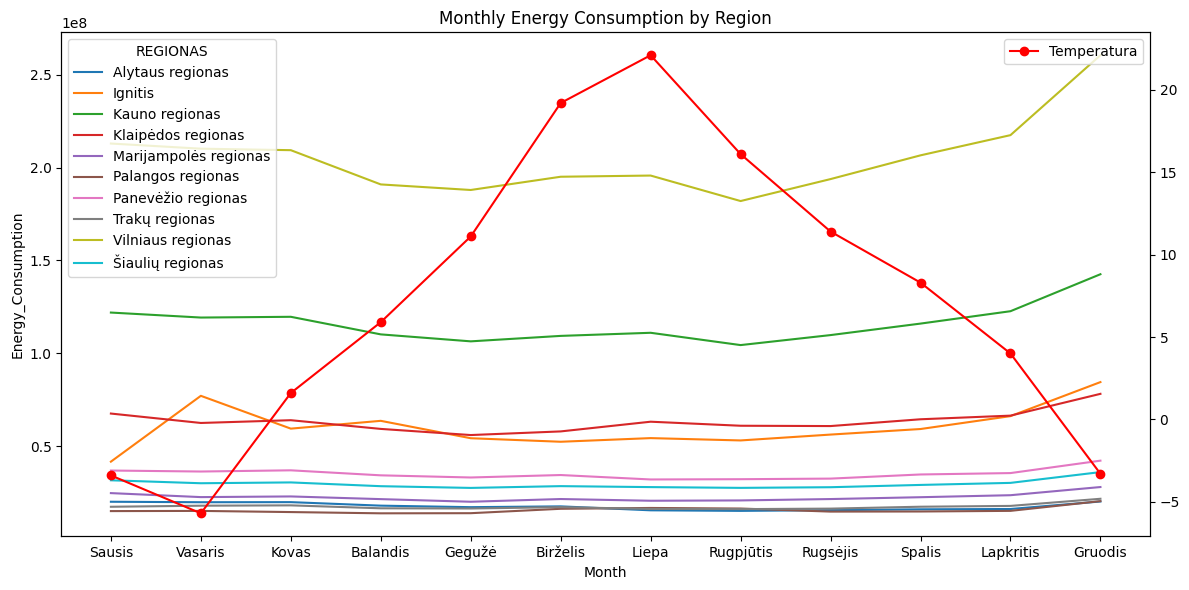

In [ ]:
# Melt the DataFrame to long format
df_long_metai = pd.melt(top_metai.drop(columns=['bendras']), id_vars=['REGIONAS'], var_name='Month', value_name='Energy_Consumption')

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))
# plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long_metai, x='Month', y='Energy_Consumption', hue='REGIONAS', ax=ax1)

ax2 = ax1.twinx()
ax2.plot(oraidf['menuo'], oraidf['temperatura'], color='red', marker='o', label='Temperatura')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.title('Monthly Energy Consumption by Region')
plt.legend()
plt.tight_layout()
plt.show()
# Įdomus pastebėjimas, kad Ignitis suvartojas tiek pat kiek Klaipėdos regionas
# Nėra priklausomybės nuo vidutinės oro temperatūros ir suvartojamos energijos

In [29]:
metai['reg'] = metai['REGIONAS'].apply(lambda x: x if x in top_10 else 'Kiti regionai')
metai.head(2)

,REGIONAS,Sausis,Vasaris,Kovas,Balandis,Gegužė,Birželis,Liepa,Rugpjūtis,Rugsėjis,Spalis,Lapkritis,Gruodis,bendras,reg
0,Alytaus regionas,20123299.60,19866989.61,19913215.16,18020739.73,17207822.57,17636441.35,15514579.40,15213504.72,15583302.57,16049473.89,16216005.07,20262488.73,2.116079e+08,Alytaus regionas
1,Ignitis,41701247.14,77143743.66,59479933.82,63679701.76,54315121.04,52418481.41,54378473.34,53126116.33,56282256.22,59271665.85,66208154.39,84533569.88,7.225385e+08,Ignitis


In [35]:
reg = metai.groupby(['reg'])[['bendras']].sum().reset_index()
reg.head(2)

,reg,bendras
0,Alytaus regionas,2.116079e+08
1,Ignitis,7.225385e+08


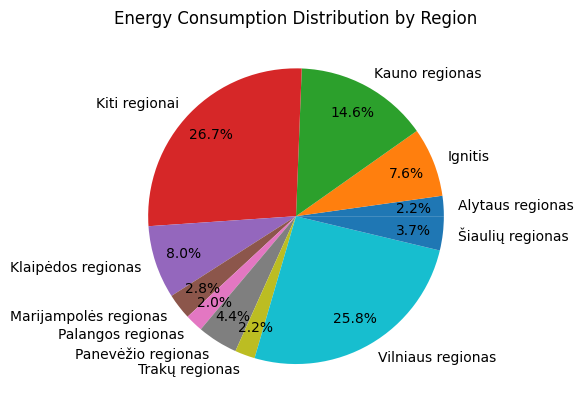

In [42]:
plt.pie(reg['bendras'], labels=reg['reg'], autopct='%1.1f%%', startangle=0, pctdistance=0.8, labeldistance=1.1)

# Title
plt.title('Energy Consumption Distribution by Region')

# Show the plot
plt.show()
# Matome, kad šiek tie daugiau nei puse Lietuvos suvartojamos energijos suvartoja trijų didžiųjų miestų regionai

In [100]:
# Titanikas
train = pd.read_csv('../../../eismas/titanic/train.csv')
test = pd.read_csv('../../../eismas/titanic/test.csv')
gender = pd.read_csv('../../../eismas/titanic/gender_submission.csv')

In [3]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
#  Cabin stulpelį galime atmesti, nes trūksta daugiau nei 50% duomenų ?
#  iš Cabin galime pasidaryti Deck stulpelį (pagal pirmą Cabin simbolį), trūkstamus užpildyti su U - Unknown

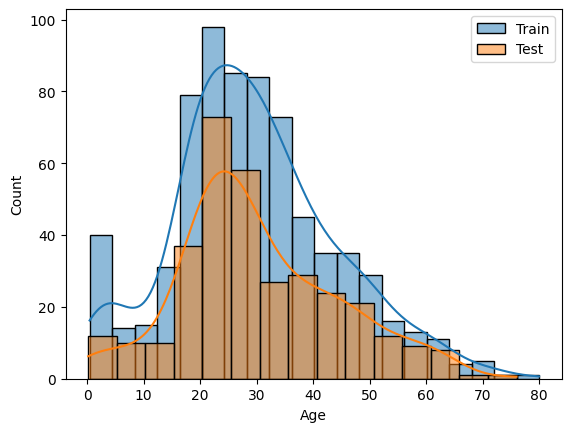

In [101]:
sns.histplot(train['Age'], kde=True, label='Train')
sns.histplot(test['Age'], kde=True, label='Test')

plt.legend()
plt.show()
# Matome, kad amžius pasiskirtymas tiek Train, tiek Test duomenyse labai panašus. Trūstamus amžiaus duomenis galima užpildyti vidurkiais

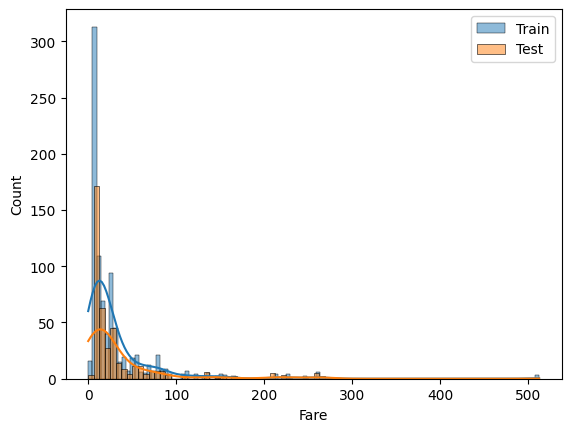

In [102]:
sns.histplot(train['Fare'], kde=True, label='Train')
sns.histplot(test['Fare'], kde=True, label='Test')

plt.legend()
plt.show()
# Matome, kad daugiausia yra žmonių turinčių pigesnius bilietus
# Trūstamus duomenis galime užpildyti su mediana

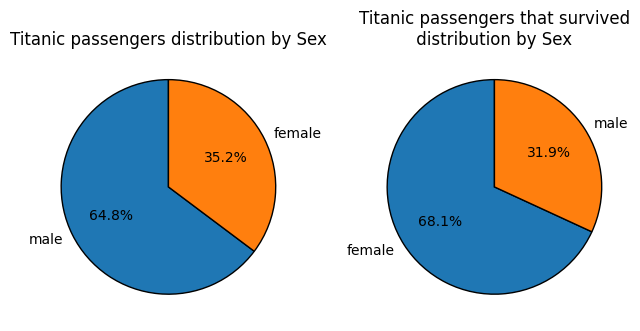

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sex = train['Sex'].value_counts()
surv = train[train['Survived'] == 1]['Sex'].value_counts()
# sex.values
ax1.pie(sex.values, labels=sex.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
ax1.set_title('Titanic passengers distribution by Sex')
ax2.pie(surv.values, labels=surv.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
ax2.set_title('Titanic passengers that survived\n distribution by Sex ')
plt.tight_layout()
plt.show()
# moterys sudaro beveik du trečdalius keleivių

In [13]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [111]:
# užpildome missing values
# .mean() nes normalus (Gauso?) pasiskirstymas
train['Age'] = train['Age'].fillna(train['Age'].mean().round())
test['Age'] = test['Age'].fillna(test['Age'].mean().round())

# .median() nes right-skewed pasiskirtstymas
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# mode()  - paima dažniausiai pasikartojančią reikšmę (nes kategorinis)
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])


In [112]:
# # pasidaron Deck stulpelį
def set_deck(x):
    if pd.notnull(x):
        return x[0]
    else:
        return 'U'
    
train['Deck'] = train['Cabin'].apply(set_deck)
test['Deck'] = test['Cabin'].apply(set_deck)



In [113]:
#  pasidarom stulpelį FamilyOf - bendras šeimos narių skaičius Titanike
train['FamilyOf'] = train['SibSp'] + train['Parch'] + 1  # +1 nes pats asmuo
test['FamilyOf'] = test['SibSp'] + test['Parch'] + 1  # +1 nes pats asmuo


In [114]:
# pasidarom stulpelį kreipinys - Title

def set_title(x):
    return x.split(',')[1].strip().split(' ')[0]

train['Title'] = train['Name'].apply(set_title)
test['Title'] = test['Name'].apply(set_title)


In [115]:
c = test['Title'].value_counts()
d = train['Title'].value_counts()
print(c)
print(d)
#  title gaunasi skirtingi train ir test duomenyse
# tikėtina jei skirtingas bazes encodinsime, tai gausim skirtingus title kodus. 
# Gal reiktų lenteles sujungti ir tada encodinti bet ir misinging values supildyti

Title
Mr.        240
Miss.       78
Mrs.        72
Master.     21
Col.         2
Rev.         2
Ms.          1
Dr.          1
Dona.        1
Name: count, dtype: int64
Title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Ms.            1
Mme.           1
Don.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64


In [64]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck', 'FamilyOf',
       'Title'],
      dtype='object')

In [68]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilyOf,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U,2,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2,Mrs.


In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
categorical_columns = ['Sex', 'Embarked', 'Deck', 'Title' ]

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    train[col] = label_encoders[col].fit_transform(train[col])
    test[col] = label_encoders[col].fit_transform(test[col])

In [ ]:
test

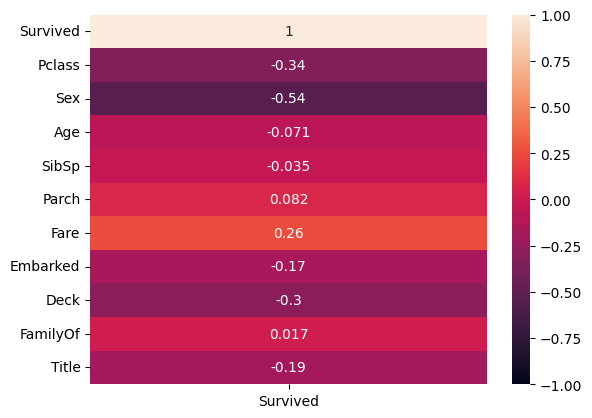

In [118]:
fig, ax = plt.subplots()
sns.heatmap(data=train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin']).corr()['Survived'].to_frame(), vmin=-1, vmax=1, annot=True, ax=ax)
plt.show()

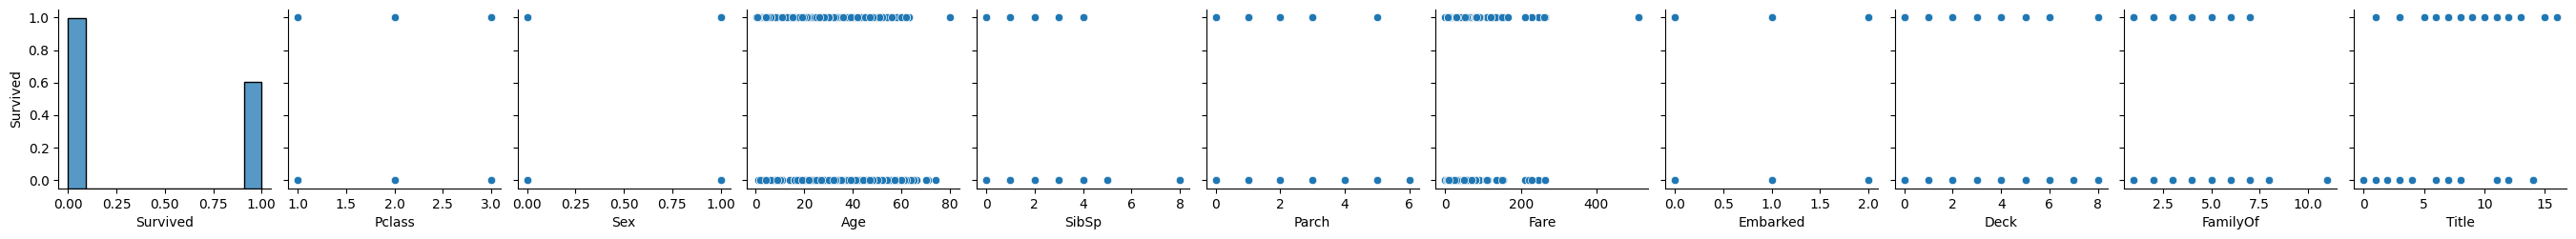

In [76]:
sns.pairplot(data=train, y_vars='Survived', x_vars = [x for x in list(train.columns) if x not in ['PassengerId', 'Name', 'Ticket', 'Cabin']])
plt.show()

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, roc_curve, precision_score, recall_score, f1_score
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, precision_score, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [119]:

# Nustatom X ir y ir splittinam
X = train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Title', 'Survived'])
y = train['Survived'].values      # target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fit score: 82.12290502793296
Accuracy score: 0.8212290502793296
Precision score: 0.8174311926605504
Recall score: 0.8117117117117117
F1 score: 0.8141225337487019


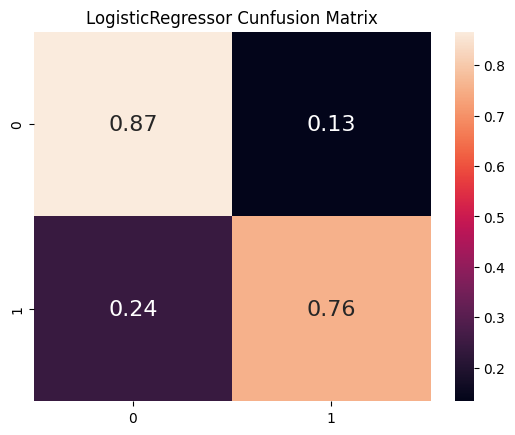

In [120]:
# Modeliai
logreg = LogisticRegression().fit(X_train, y_train)
y_pred = logreg.predict(X_test)
fit_score = logreg.score(X_test, y_test) *100.0
print(f'fit score: {fit_score}')

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {acc}')

precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision score: {precision}')

recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall score: {recall}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1}')


cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.title('LogisticRegressor Cunfusion Matrix')
plt.show()

fit score: 76.53631284916202
Accuracy score: 0.7653631284916201
Precision score: 0.7581081081081081
Recall score: 0.7581081081081081
F1 score: 0.7581081081081081


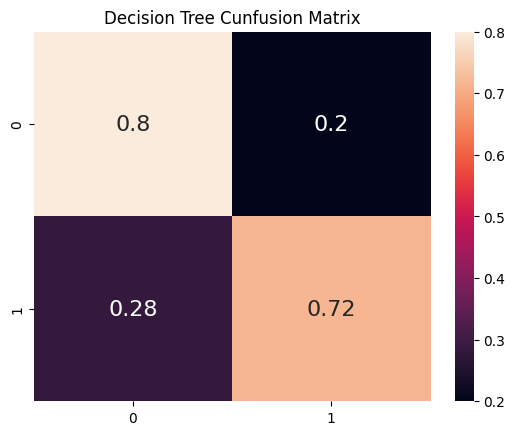

In [122]:
destree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = destree.predict(X_test)
fit_score = destree.score(X_test, y_test) *100.0
print(f'fit score: {fit_score}')

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {acc}')

precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision score: {precision}')

recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall score: {recall}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1}')


cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.title('Decision Tree Cunfusion Matrix')
plt.show()

fit score: 80.44692737430168
Accuracy score: 0.8044692737430168
Precision score: 0.8003952569169961
Recall score: 0.7934362934362934
F1 score: 0.7962270287851683


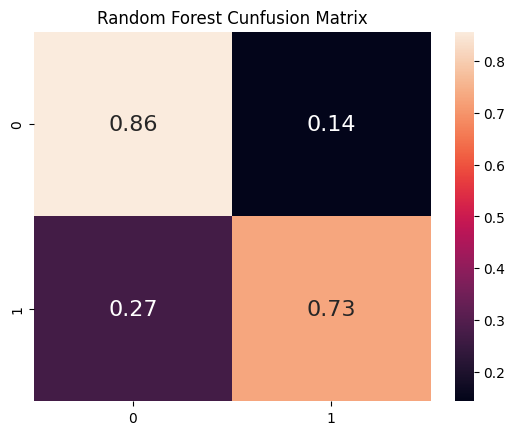

In [121]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
fit_score = rf.score(X_test, y_test) *100.0
print(f'fit score: {fit_score}')

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {acc}')

precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision score: {precision}')

recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall score: {recall}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1}')


cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.title('Random Forest Cunfusion Matrix')
plt.show()

In [125]:
# spejimai
test_pred_logreg = logreg.predict(test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Title']))
test_pred_destree = destree.predict(test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Title']))
test_pred_rf = rf.predict(test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Title']))


In [127]:
test['suv_logreg'] = test_pred_logreg
test['suv_destree'] = test_pred_destree
test['suv_rf'] = test_pred_rf
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilyOf,Title,suv_logreg,suv_destree,suv_rf
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,7,1,5,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,7,2,6,0,1,0


In [134]:
df = test[['PassengerId', 'suv_rf']]
df = df.rename(columns={'suv_rf': 'Survived'})

# Save to CSV file
df.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
# logreg kaggle score: 0.76315
# destree kaggle score: 0.72727
# Random forest kaggle score: 0.76794

In [135]:
# Antras bandymas.
# Sujungti lenteles su concat, vertinti ir Title
train = pd.read_csv('../../../eismas/titanic/train.csv')
test = pd.read_csv('../../../eismas/titanic/test.csv')
gender = pd.read_csv('../../../eismas/titanic/gender_submission.csv')

In [138]:
train['source'] = 'TRAIN'
test['source'] = 'TEST'

combined = pd.concat([train, test], axis=0, ignore_index=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [139]:
combined['Age'] = combined['Age'].fillna(combined['Age'].mean().round())
combined['Fare'] = combined['Fare'].fillna(combined['Fare'].median())
combined['Embarked'] = combined['Embarked'].fillna(combined['Embarked'].mode()[0])
combined['Deck'] = combined['Cabin'].apply(set_deck)
combined['FamilyOf'] = combined['SibSp'] + combined['Parch'] + 1  # +1 nes pats asmuo
combined['Title'] = combined['Name'].apply(set_title)

In [140]:
categorical_columns = ['Sex', 'Embarked', 'Deck', 'Title' ]

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    combined[col] = label_encoders[col].fit_transform(combined[col])


In [145]:
# Atskiriam atgal į test ir train lenteles
train_df = combined[combined['source'] == 'TRAIN']
test_df = combined[combined['source'] == 'TEST']


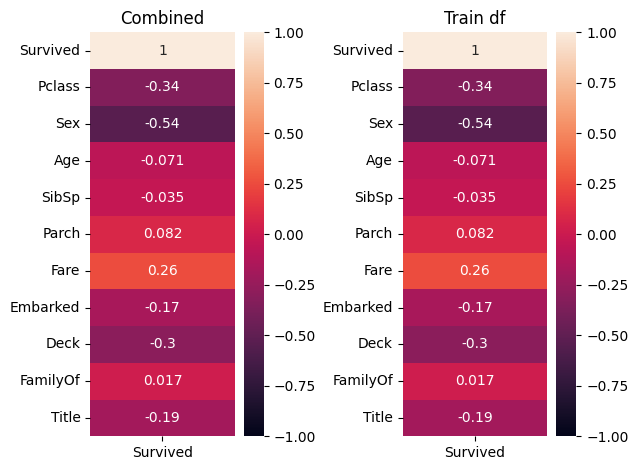

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.heatmap(data=combined.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'source']).corr()['Survived'].to_frame(), vmin=-1, vmax=1, annot=True, ax=ax1)
sns.heatmap(data=combined.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'source']).corr()['Survived'].to_frame(), vmin=-1, vmax=1, annot=True, ax=ax2)
ax1.set_title('Combined')
ax2.set_title('Train df')
plt.tight_layout()
plt.show()

In [150]:
# Nustatom X ir y ir splittinam
X = train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived', 'source'])
y = train_df['Survived'].values      # target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fit score: 81.00558659217877
Accuracy score: 0.8100558659217877
Precision score: 0.8041827541827542
Recall score: 0.8041827541827542
F1 score: 0.8041827541827542


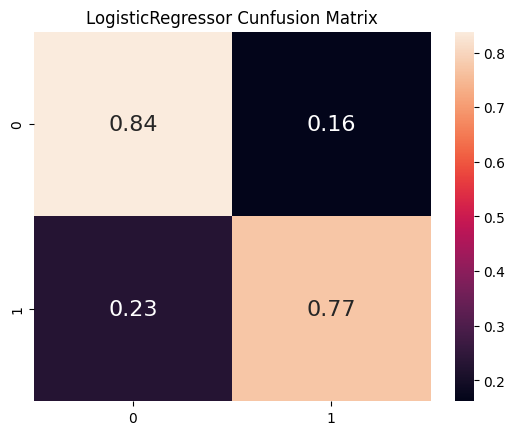

In [152]:
logreg = LogisticRegression().fit(X_train, y_train)
y_pred = logreg.predict(X_test)
fit_score = logreg.score(X_test, y_test) *100.0
print(f'fit score: {fit_score}')

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {acc}')

precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision score: {precision}')

recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall score: {recall}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1}')


cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.title('LogisticRegressor Cunfusion Matrix')
plt.show()

fit score: 77.6536312849162
Accuracy score: 0.776536312849162
Precision score: 0.76960909555442
Recall score: 0.7716216216216216
F1 score: 0.7705128205128204


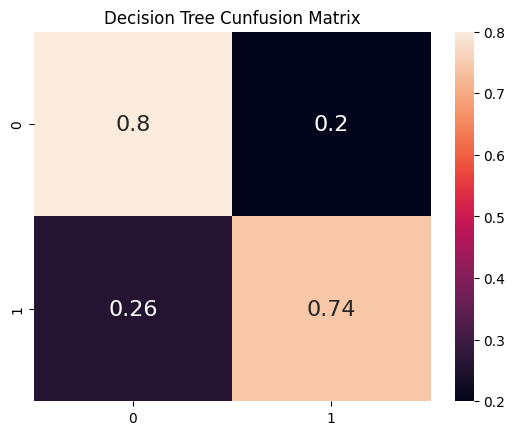

In [153]:
destree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = destree.predict(X_test)
fit_score = destree.score(X_test, y_test) *100.0
print(f'fit score: {fit_score}')

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {acc}')

precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision score: {precision}')

recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall score: {recall}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1}')


cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.title('Decision Tree Cunfusion Matrix')
plt.show()

fit score: 83.24022346368714
Accuracy score: 0.8324022346368715
Precision score: 0.8291612057667104
Recall score: 0.8232303732303732
F1 score: 0.8257398753894081


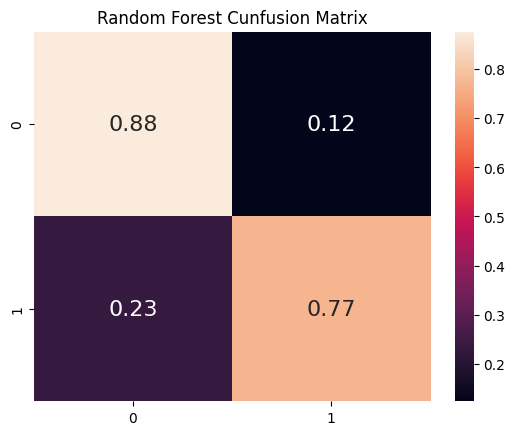

In [154]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
fit_score = rf.score(X_test, y_test) *100.0
print(f'fit score: {fit_score}')

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {acc}')

precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision score: {precision}')

recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall score: {recall}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1}')


cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.title('Random Forest Cunfusion Matrix')
plt.show()

In [156]:
test_pred_rf = rf.predict(test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'source', 'Survived']))
test_df['suv_rf'] = test_pred_rf

In [161]:
df = test_df[['PassengerId', 'suv_rf']]
df = df.rename(columns={'suv_rf': 'Survived'})
df['Survived'] = df['Survived'].apply(lambda x: int(x))
df.head()
# Save to CSV file
df.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
# Random forest kaggle score: 0.75358 (Su Title)
# Random forest kaggle score: 0.76794